# Sentiment Analysis 

Import of required packages.

In [9]:
!pip install wordcloud

     |████████████████████████████████| 368kB 4.1MB/s eta 0:00:01


In [16]:
from textblob import TextBlob as txt
import nltk as nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
import string
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Creating and mini - cleaning the Data Frame


In [3]:
df = pd.read_csv('file.csv',sep=',')#Import of Data-Set
df.drop(['id','keys','imageURLs','asins'],axis=1,inplace=True)  # Dropping unnecessary Columns

####  With the aid of the package called 'Textblob' we can add 2 new columns to our Data Frame. The column 'Polarity Ratings' will describe the overall polarity of the Review text. The polarity is standardized between - 1 to 1. 
#### Which stands for very negative up to very positive, respectively.


In [11]:

polarity = [ txt(x).sentiment.polarity for x in df['reviews.text']]   # Using Textblob to analyse polarity of every review
df['polarity ratings'] = polarity  # Adding every polarity to Data Frame
opinion = [ txt(x).sentiment.subjectivity for x in df['reviews.text']] # Using Textblob to analyze subjectivity of every review.
df['subjectivity'] = opinion   # 

The next step is optional. This line of code alters the columns. So, that one can read the whole review.

In [ ]:

#pd.set_option('display.max_colwidth', -1) # Setting Cell-width to read reviews


The polarity and subjectivity alone don't do much. That is precisely why we dig even further on a word to word basis. The next step takes all the written words in across all review texts and strings everything together in one variable called 'reviews_whole'.


In [12]:
cv  = CountVectorizer(stop_words ='english')
data_cv =cv.fit_transform(df['reviews.text']) # Vectorizing whole text into a Word - Count Matrix
data_vectorized = pd.DataFrame(data_cv.toarray(),columns = cv.get_feature_names()) # Creating a new Data Frame

reviews_whole = ''     #Empty String to chain every review together, for word count and word clouds later
for element in df['reviews.text']:
    reviews_whole = reviews_whole + " " + element # getting all reviews into one string

Very common words in the english language such as 'I','our','we' etc. are not really helpful when comparing word counts in order ot figure out what the reviews are all about. Thats why we exclude stopwords from the 'reviews_whole' string altogether. Futhermore, we exclude a bunch of other text, which might not give any information at all and is kind of 'in the way' of our further analysis.


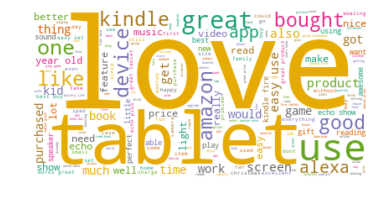

In [28]:

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


clean_data = clean_text_round1(reviews_whole)
clean_data
clean_data_list = [x for x in clean_data.split()]
stop_words = set(stopwords.words('english'))
stop = []
for element in clean_data_list:     #Removing 
    if element not in stop_words:    #stop
        stop.append(element)          #words from Data-Set
stop_string = ''

for element in stop:
    stop_string=stop_string +' '+ element

x= Counter(stop).most_common()   # Counting the occurrences of all words and then giving back a tuple of the most common words used
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)



In [ ]:
wc.generate(stop_string)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

<BarContainer object of 10 artists>

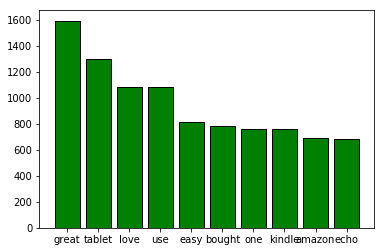

In [14]:
x1,y1 = zip(*x)
plt.bar(x1[:10],y1[:10],color='g',edgecolor='black')

In [17]:
word_sentiment_polarity = [txt(x).sentiment.polarity for x in x1]
word_sentiment_subjectivity = [txt(x).sentiment.polarity for x in x1]

In [82]:
m = np.array((x1,word_sentiment_polarity,word_sentiment_subjectivity,y1))
data_frame =pd.DataFrame(m).T
data_frame.columns=['word','polarity','subjectivity','count']
data_frame['count'].astype(int,inplace=True)
#data_frame[data_frame['count'].astype(int)> 33]
data_frame.iloc[:100].

    


,word,polarity,subjectivity,count
0,great,0.8,0.8,1591
1,tablet,0.0,0.0,1296
2,love,0.5,0.5,1083
3,use,0.0,0.0,1081
4,easy,0.43333333333333335,0.43333333333333335,816
5,bought,0.0,0.0,784
6,one,0.0,0.0,759
7,kindle,0.0,0.0,756
8,amazon,0.0,0.0,688
9,echo,0.0,0.0,686
